## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [2]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [11]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.
import time
from bs4 import BeautifulSoup
import requests
questions = []
for i in range(1,6):
    res = requests.get(f"https://hashcode.co.kr/?page={i}",user_agent)
    soup = BeautifulSoup(res.text, 'html.parser')
    li_tags = soup.find_all('li', 'question-list-item')

    # for li in li_tags:
    #     print(li.h4.text)
    questions += [li.h4.text.strip() for li in li_tags]
    time.sleep(0.5)

questions[:10]

['vs code를 이용하는데 windows환경 파일 경로 인식이 안됩니다.ㅠㅠ',
 'C# 인터페이스를 상속 받은  클래스를 구별할 수 있나요 ?',
 '[스프링부트] 컨트롤러와 매핑된 핸들러가 없는 오류',
 '포트번호를 firewall 로 인바운드&아웃바운드를 차단 설정하면 보안상 안전하다고 할 수 있을까요?',
 '이미지를 크롤링하여 다운로드 할때 생기는 오류',
 '유니티 리듬게임 제작 (메트로놈 제작) 관련 질문입니다.',
 'if문 기초 질문가능할까요?',
 "웹 스크래핑 독학 중인,, 초렙이 질문합니다 '-',,",
 "AttributeError: Module 'scipy' has no attribute '_lib' 질문드립니다.",
 '현업 spring 개발에 대한 궁금증']

In [12]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [14]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.
hannanum = Hannanum()
words = []

for q in questions:
    nouns = hannanum.nouns(q) # 명사들 추가됨.
    words += nouns
len(words)

1090

In [15]:
# counter를 이용해 각 단어의 개수를 세줍니다.
from collections import Counter

cnt = Counter(words)
cnt

Counter({'질문': 46,
         '파이썬': 45,
         '문제': 22,
         '코드': 20,
         '수': 16,
         '오류': 15,
         '방법': 14,
         '언어': 13,
         '중': 12,
         '저장': 11,
         '때': 10,
         '발생': 10,
         '관련': 9,
         '질문드': 9,
         '코딩테스트': 9,
         '자바': 9,
         '사용': 9,
         '출력': 8,
         '파': 7,
         '문': 7,
         '파일': 7,
         '에러': 7,
         '코딩': 7,
         '구현': 7,
         '프로그램': 7,
         '식': 6,
         '부분': 6,
         '이미지': 5,
         '프로그래머스': 5,
         '판다스': 5,
         '입력': 5,
         '값': 5,
         '자바스크립트': 5,
         '것': 5,
         '데이터': 5,
         '이용': 4,
         '기초': 4,
         '방식': 4,
         '배열': 4,
         '텍스트': 4,
         '공부': 4,
         '합': 4,
         '후': 4,
         '해결': 4,
         '한': 4,
         '실행': 4,
         '메소드': 4,
         '2': 4,
         '안': 4,
         '환경': 3,
         '경': 3,
         '클래스': 3,
         '웹사이트': 3,
         '크롤링': 3,
      

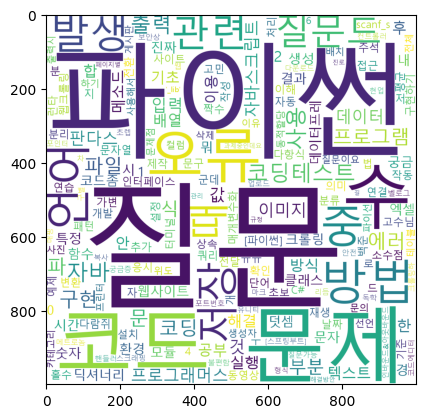

In [17]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wc = WordCloud(
    font_path = "/Users/jykim/opt/anaconda3/envs/2023-DS-A/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/malgun.ttf",
    background_color= 'white',
    height = 1000,
    width= 1000
)
img = wc.generate_from_frequencies(cnt)
plt.imshow(img)